In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='uniform')
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

In [2]:
DATASET_DIRECTORY = '/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/'

In [3]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets)*.67)]
test_sets = df_sets[int(len(df_sets)*.67):]

In [4]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

In [5]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'
dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [6]:
ML_models = [ # Adjust num_classes as per your requirement
        LogisticRegression(),
        RandomForestClassifier(n_estimators=50,random_state=42,class_weight='balanced'),
        XGBClassifier(n_estimators=50)
        ]

ML_names = [
        "Logistic Regression",
        "Random Forest",
        "XG BOOST"
]

for train_set in tqdm(training_sets):
        d = pd.read_csv(DATASET_DIRECTORY + train_set)
        d[X_columns] = scaler.fit_transform(d[X_columns])
        new_y = [dict_2classes[k] for k in d[y_column]]
        d[y_column] = new_y
        X_train = d[X_columns].values
        y_train = d[y_column].values
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        for model in ML_models:
                    model.fit(X_train, y_train_encoded)
        del d

100%|██████████| 113/113 [55:08<00:00, 29.28s/it]


In [7]:
original_labels=["Attack","Benign"]

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.fit_transform(d_test[X_columns])
    new_y = [dict_2classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y

    y_test += list(d_test[y_column].values)
    
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        del y_pred
del d_test

100%|██████████| 56/56 [06:24<00:00,  6.87s/it]



Confusion Matrix for Logistic Regression:



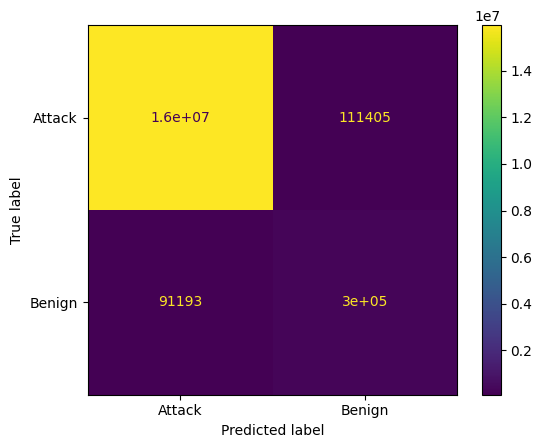

transfered
Logistic Regression
              precision    recall  f1-score   support

      Attack       0.99      0.99      0.99  16072228
      Benign       0.73      0.76      0.74    387031

    accuracy                           0.99  16459259
   macro avg       0.86      0.88      0.87  16459259
weighted avg       0.99      0.99      0.99  16459259

accuracy_score:  0.9876909404001724
recall_score:  0.8603799384337592
precision_score:  0.8787232626795806
f1_score:  0.8693100563617961

Confusion Matrix for Random Forest:



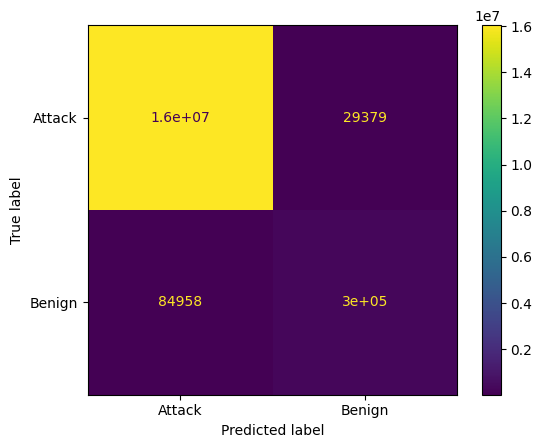

transfered
Random Forest
              precision    recall  f1-score   support

      Attack       0.99      1.00      1.00  16072228
      Benign       0.91      0.78      0.84    387031

    accuracy                           0.99  16459259
   macro avg       0.95      0.89      0.92  16459259
weighted avg       0.99      0.99      0.99  16459259

accuracy_score:  0.9930533324738374
recall_score:  0.9530474675409002
precision_score:  0.889329966077903
f1_score:  0.9186562421576918

Confusion Matrix for XG BOOST:



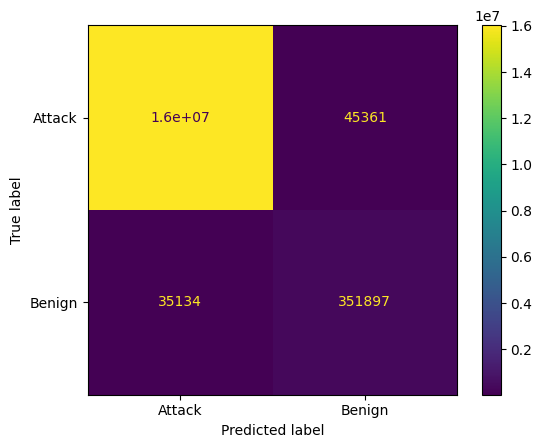

transfered
XG BOOST
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00  16072228
      Benign       0.89      0.91      0.90    387031

    accuracy                           1.00  16459259
   macro avg       0.94      0.95      0.95  16459259
weighted avg       1.00      1.00      1.00  16459259

accuracy_score:  0.9951094396169353
recall_score:  0.9418136807438451
precision_score:  0.9531997100469933
f1_score:  0.9474303390766751


In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
for k,v in preds.items():
    y_pred = v
    label_encoder.fit(original_labels)
    y_pred = label_encoder.inverse_transform(y_pred)
    print(f"\nConfusion Matrix for {ML_names[k]}:\n")
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    print("transfered")    
    print(f"{ML_names[k]}")
    print(classification_report(y_test,y_pred))
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))

In [10]:
for i in range(len(ML_models)):
    model = ML_models[i]
    import pickle
    with open('/kaggle/working/'+ML_names[i]+'.pkl', 'wb') as f:
        pickle.dump(model, f)